In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.6-cp313-cp313-win_amd64.whl.metadata (169 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    ---------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

Matplotlib is building the font cache; this may take a moment.


In [7]:
# Load the iris dataset
iris = load_iris()
    
# Create a DataFrame with feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
    
# Add target column (species names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [10]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [13]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [14]:
# Basic statistics of numerical columns
print("Statistical Summary of Numerical Columns:")
print(df.describe())

# Group by analysis
print("\nAverage measurements by species:")
print(df.groupby('species').mean())

# Calculate standard deviation by species
print("\nStandard deviation by species:")
print(df.groupby('species').std())

Statistical Summary of Numerical Columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Average measurements by species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                           

C:\Users\Admin\AppData\Local\Temp\ipykernel_6420\2679662401.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_6420\2679662401.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('species').std())


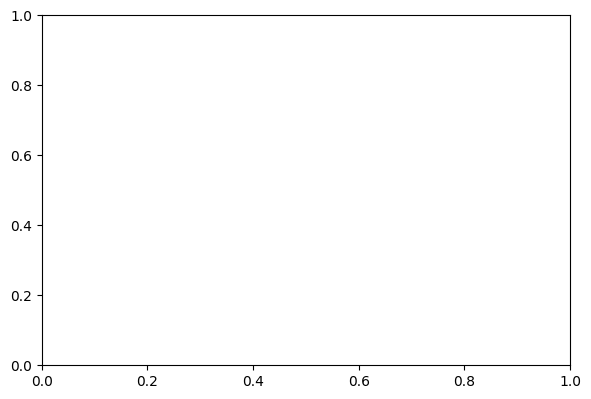

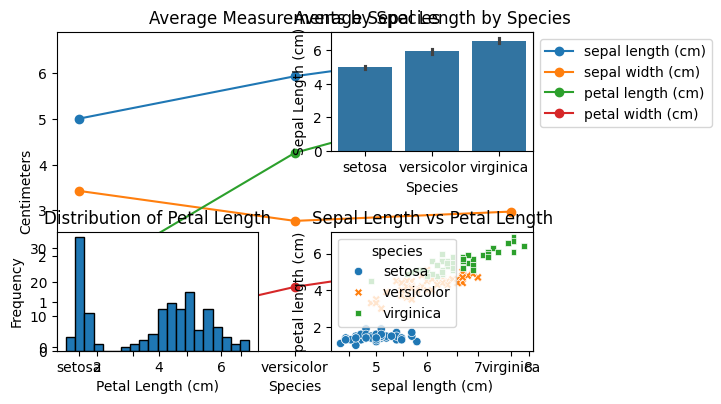

In [23]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Line plot: Average measurements by species
plt.subplot(2, 2, 1)
df.groupby('species', observed=True).mean().plot(marker='o')  # Added observed=True
plt.title('Average Measurements by Species')
plt.xlabel('Species')
plt.ylabel('Centimeters')
# Move legend to a better position
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

# 2. Bar chart: Average sepal length by species
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='species', y='sepal length (cm)')
plt.title('Average Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

# 3. Histogram: Distribution of petal length
plt.subplot(2, 2, 3)
plt.hist(df['petal length (cm)'], bins=20, edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

# 4. Scatter plot: Sepal length vs Petal length
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', 
                hue='species', style='species')
plt.title('Sepal Length vs Petal Length')

# Call tight_layout and adjust spacing
plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Make room for legend
plt.show()

<Figure size 1000x800 with 0 Axes>

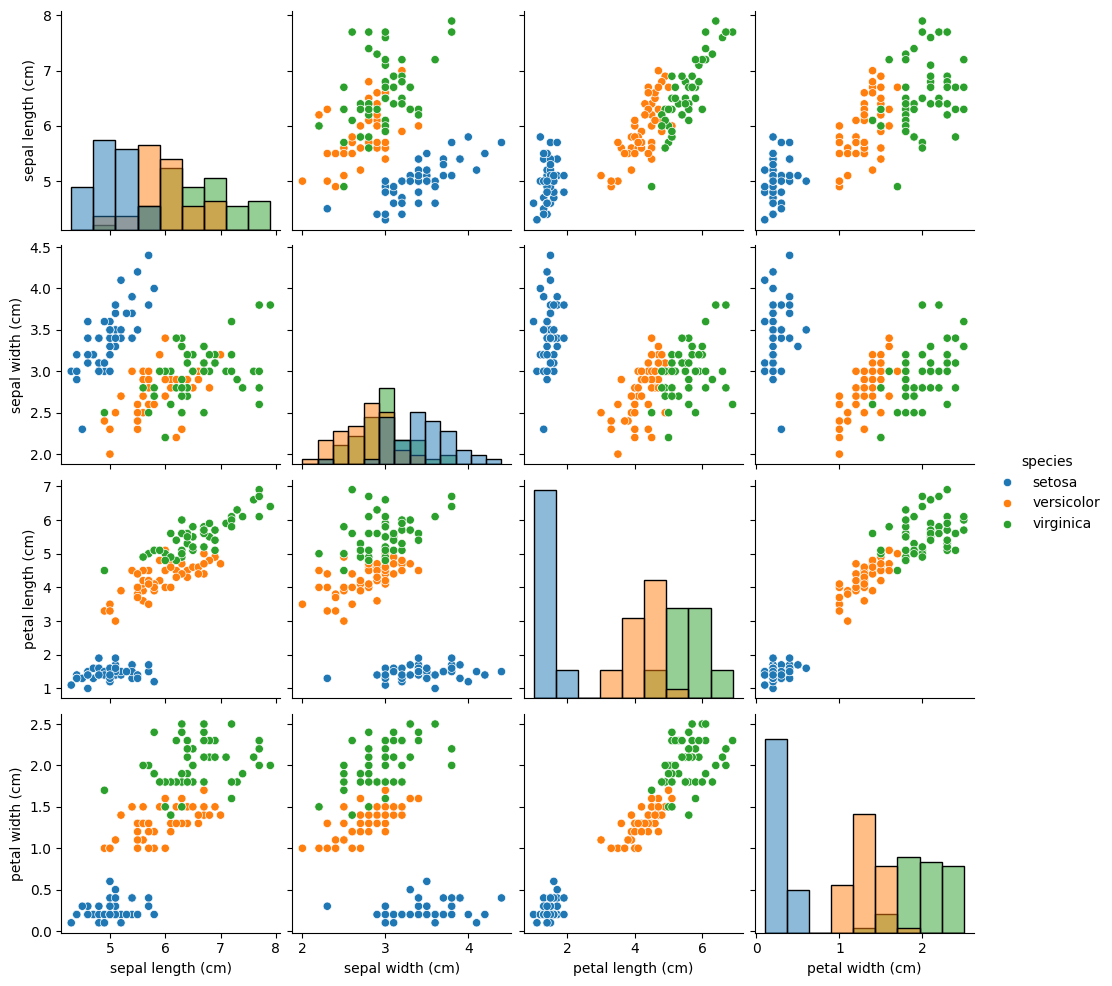

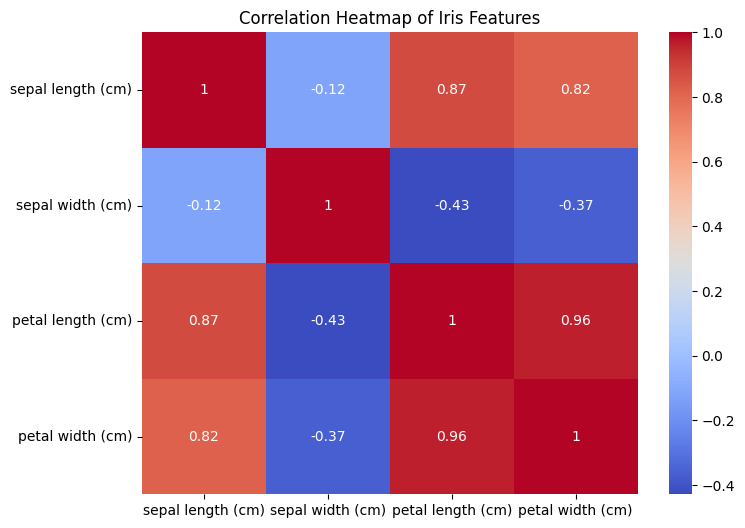

In [24]:
# Create pairplot to show relationships between all features
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df.drop('species', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

In [19]:
print("Key Findings from the Iris Dataset Analysis:")
print("\n1. Dataset Structure:")
print(f"   - Total number of samples: {len(df)}")
print(f"   - Number of features: {len(df.columns) - 1}")  # Excluding species column
print(f"   - Number of species: {len(df['species'].unique())}")

print("\n2. Species Distribution:")
print(df['species'].value_counts())

print("\n3. Feature Correlations:")
print("   - Strongest correlation:", end=" ")
corr_matrix = df.drop('species', axis=1).corr()
max_corr = corr_matrix.unstack()
max_corr = max_corr[max_corr != 1.0]
print(f"{max_corr.idxmax()[0]} and {max_corr.idxmax()[1]}: {max_corr.max():.2f}")

print("\n4. Species Characteristics:")
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    print(f"\n   {species}:")
    print(f"   - Average petal length: {species_data['petal length (cm)'].mean():.2f} cm")
    print(f"   - Average petal width: {species_data['petal width (cm)'].mean():.2f} cm")

Key Findings from the Iris Dataset Analysis:

1. Dataset Structure:
   - Total number of samples: 150
   - Number of features: 4
   - Number of species: 3

2. Species Distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

3. Feature Correlations:
   - Strongest correlation: petal length (cm) and petal width (cm): 0.96

4. Species Characteristics:

   setosa:
   - Average petal length: 1.46 cm
   - Average petal width: 0.25 cm

   versicolor:
   - Average petal length: 4.26 cm
   - Average petal width: 1.33 cm

   virginica:
   - Average petal length: 5.55 cm
   - Average petal width: 2.03 cm
